# Imports and mount drive

In [ ]:
import numpy as np
import pandas as pd
import os 
import cv2
import random
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
classes = ["Black-grass", "Charlock", "Cleavers", "Common Chickweed",
"Common wheat", "Fat Hen", "Loose Silky-bent", "Maize", "Scentless Mayweed",
"Shepherds Purse", "Small-flowered Cranesbill", "Sugar beet"]

train_directory = "drive/MyDrive/CX4041-Group-Project/Preprocessed_Train_Images"
test_directory = "drive/MyDrive//CX4041-Group-Project/Preprocessed_Test_Images/test"


# kNN Clustering

In [ ]:
classes_count = dict.fromkeys(classes, 0)

for cls in classes:
  dir = train_directory + "/" + cls
  path, dirs, files = next(os.walk(dir))
  file_count = len(files)
  classes_count[cls] = file_count

print(classes_count)


{'Black-grass': 1000, 'Charlock': 1000, 'Cleavers': 1000, 'Common Chickweed': 1000, 'Common wheat': 1000, 'Fat Hen': 1000, 'Loose Silky-bent': 1000, 'Maize': 1000, 'Scentless Mayweed': 1000, 'Shepherds Purse': 1000, 'Small-flowered Cranesbill': 1000, 'Sugar beet': 1000}


## kNN Training

Convert classes labels to have ID

In [ ]:
classes_dict = {}
for idx, cls in enumerate(classes):
  classes_dict[cls] = idx

print(classes_dict)

{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}


### Masked

In [ ]:
def masked():
  images = []
  labels = []
  for f in os.listdir(train_directory):
    for img in os.listdir(os.path.join(train_directory, f)):
      path = os.path.join(train_directory, f, img)
      img = cv2.imread(path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = cv2.resize(img, (45, 45))
      img = img.flatten()

      images.append(img)
      labels.append(f)

  images = np.array(images)
  labels = np.array(labels)

  return images, labels 

In [ ]:
images_masked, labels_masked = masked() 
print(images_masked.shape)

(12000, 2025)


In [ ]:
label_to_id_masked = {v:i for i,v in enumerate(np.unique(labels_masked))}
id_to_label_masked = {v: k for k, v in label_to_id_masked.items()}


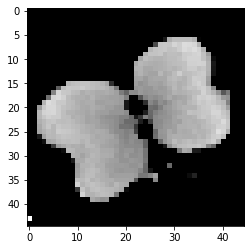

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(np.reshape(images_masked[734], (45,45)), cmap="gray")

In [ ]:
label_ids_masked = np.array([label_to_id_masked[x] for x in labels_masked])
images_masked = StandardScaler().fit_transform(images_masked)
print(images_masked.shape)

(12000, 2025)


In [ ]:
knn_masked = OneVsRestClassifier(KNeighborsClassifier())
knn_masked.fit(images_masked, label_ids_masked)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [ ]:
def mask_test():
  images_test=[]
  for f in os.listdir(test_directory):
    path = os.path.join(test_directory, f)
    img_test = cv2.imread(path, cv2.IMREAD_COLOR)
    img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
    img_test = cv2.resize(img_test, (45, 45))
    img_test = img_test.flatten()

    images_test.append(img_test)

  images_test = np.array(images_test)
  return images_test

In [ ]:
images_test_masked = mask_test()
print(images_test_masked.shape)

(794, 2025)


In [ ]:
images_test_masked = StandardScaler().fit_transform(images_test_masked)

In [ ]:
pred_masked = knn_masked.predict(images_test_masked)

pred_masked_classes = []
for pred_class in pred_masked:
  pred_masked_classes.append(id_to_label_masked[pred_class])

In [ ]:
print(knn_masked.score(images_masked, label_ids_masked))

0.75975


In [ ]:
my_submission = pd.DataFrame({'file': os.listdir(test_directory), 'species': pred_masked_classes})
my_submission.to_csv('drive/MyDrive/CZ4041_DATA/csv_results/knn_new_masked.csv', index=False)